In [490]:
import numpy as np
from scipy import sparse
from os import listdir
from scipy.stats import chi2_contingency, fisher_exact
import matplotlib.pyplot as plt

ihart_data_dir = '../split_gen_miss'
ihart_ped_file = '../data/160826.ped'
ihart_pvalue_dir = '../parental_differences_ihart'

ssc_data_dir = '../split_gen_miss_ssc'
ssc_ped_file = '../data/ssc.ped'
ssc_pvalue_dir = '../parental_differences_ssc'

bonferonni_cutoff = 11
chroms = [str(x) for x in range(1, 23)]

In [231]:
# From GRCh37.p13 https://www.ncbi.nlm.nih.gov/grc/human/data?asm=GRCh37.p13
chrom_lengths = {
	'1': 249250621,
	'2': 243199373,
	'3': 198022430,
	'4': 191154276,
	'5': 180915260,
	'6': 171115067,
	'7': 159138663,
	'8': 146364022,
	'9': 141213431,
	'10': 135534747,
	'11': 135006516,
	'12': 133851895,
	'13': 115169878,
	'14': 107349540,
	'15': 102531392,
	'16': 90354753,
	'17': 81195210,
	'18': 78077248,
	'19': 59128983,
	'20': 63025520,
	'21': 48129895,
	'22': 51304566,
	'X': 155270560,
	'Y': 59373566
}


# GWAS for sex (M/F) on the autosomal chromosomes

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

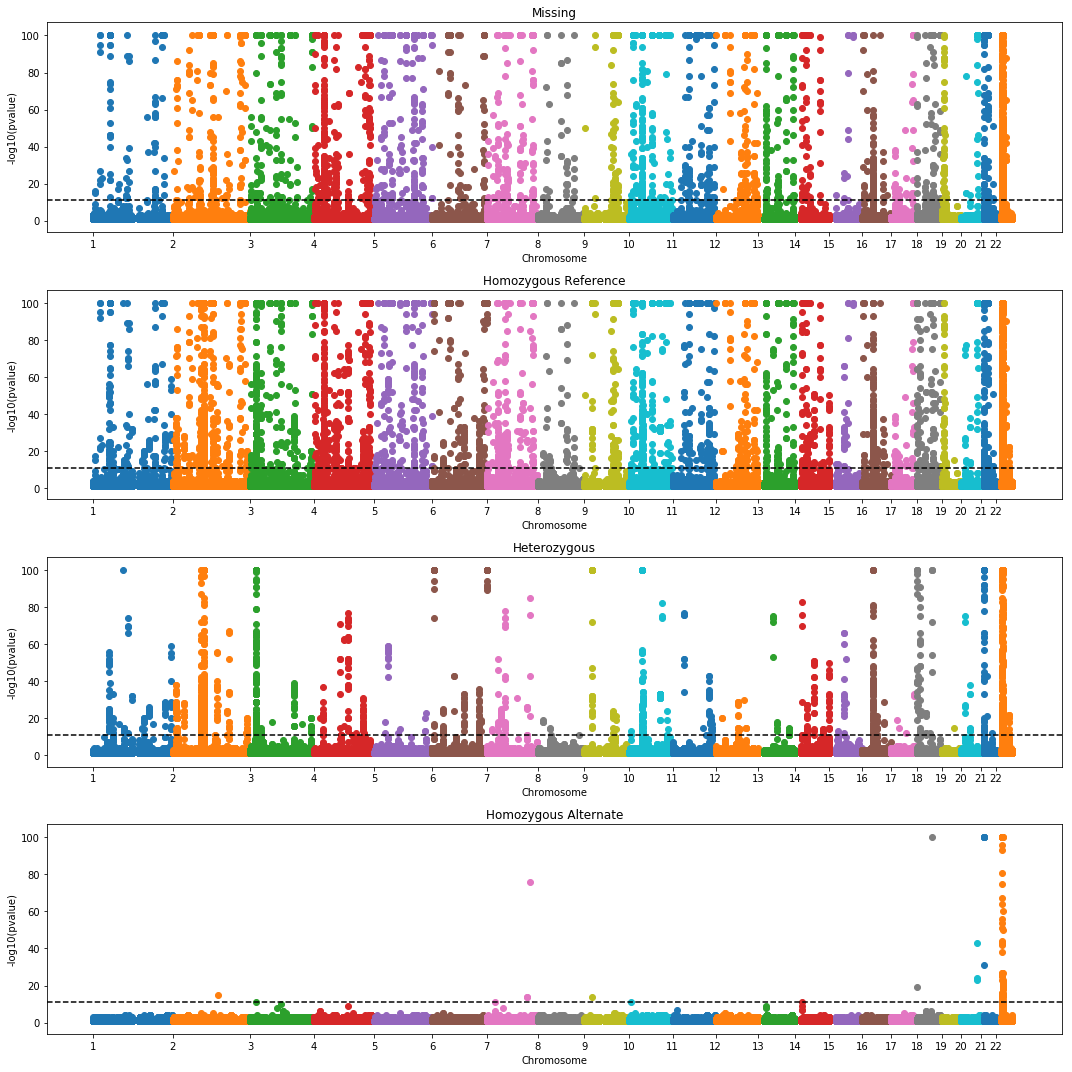

In [290]:
plt.figure(figsize=(15, 15))
offsets = [0]
sig_positions = []
for chrom in chroms:
    print(chrom, end=' ')
    
    # pull snp positions
    pos_data = np.load('%s/chr.%s.gen.coordinates.npy' % (data_dir, chrom))
    snp_positions = pos_data[:, 1]
    is_snp = pos_data[:, 2].astype(bool)
    snp_positions = snp_positions[is_snp]
    
    # pull log pvalues
    log_pvalues = np.load('%s/chr.%s.logpvalues.npy' % (pvalue_dir, chrom))
    log_pvalues[log_pvalues>100] = 100
    
    for i in range(4):
        # nonzero indices
        indices = log_pvalues[:, i] != 0

        plt.subplot(4, 1, i+1)
        plt.scatter(snp_positions[indices]+offsets[-1], log_pvalues[indices, i])
        
    indices = np.any(log_pvalues > bonferonni_cutoff, axis=1)
    sig_positions.extend([(chrom, p) for p in snp_positions[indices]])
    
    offsets.append(offsets[-1]+chrom_lengths[chrom])

titles = ['Missing', 'Homozygous Reference', 'Heterozygous', 'Homozygous Alternate']
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.xticks(offsets[:-1], chroms)
    plt.xlabel('Chromosome')
    plt.ylabel('-log10(pvalue)')
    plt.title(titles[i])
    plt.axhline(bonferonni_cutoff, color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [405]:
all_pvalues = []
for chrom in chroms:
    print(chrom, end=' ')
    # pull log pvalues
    all_pvalues.append(np.load('%s/chr.%s.logpvalues.npy' % (pvalue_dir, chrom)))

all_pvalues = np.vstack(all_pvalues)


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

(71240086, 4)


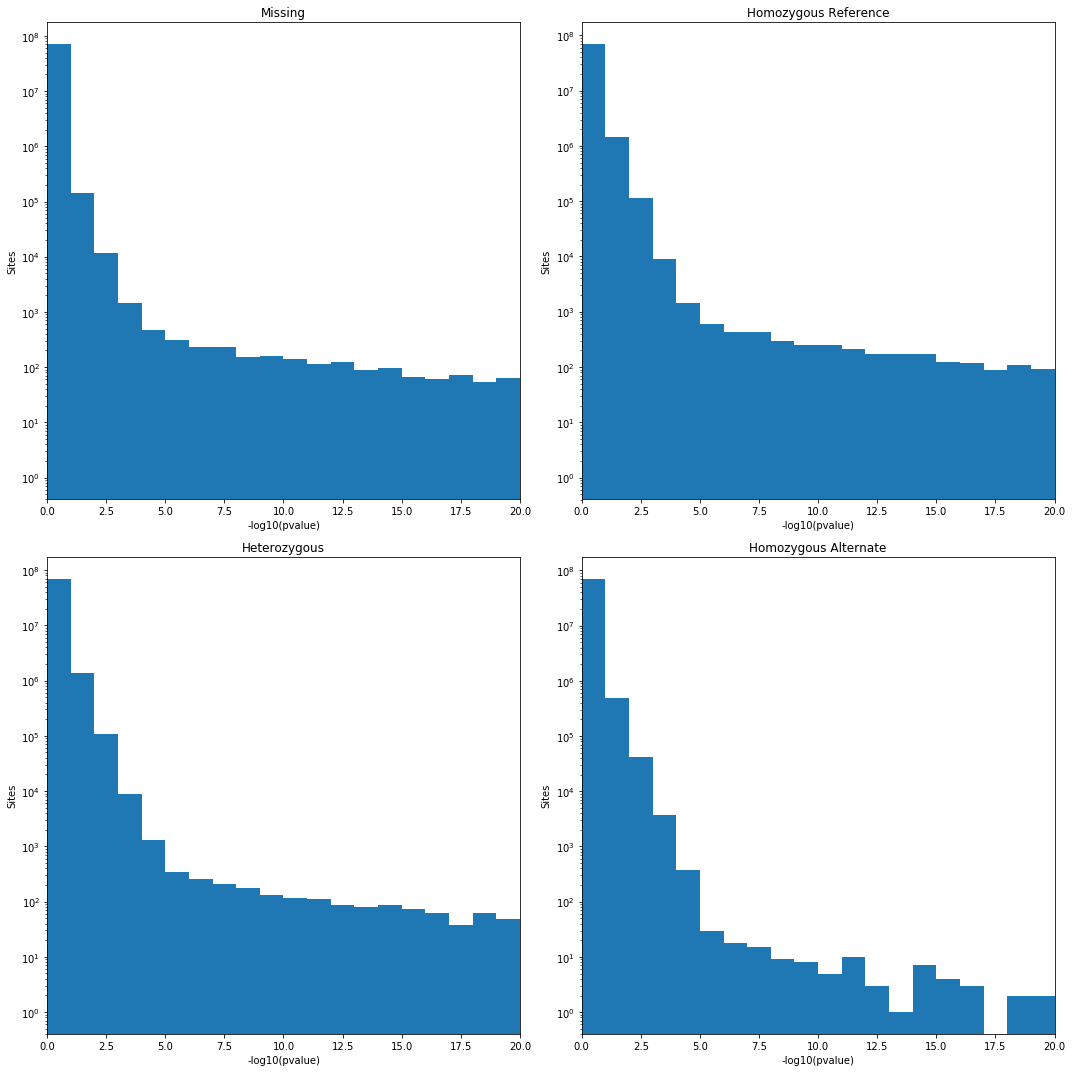

In [450]:
import scipy.stats as stats

print(all_pvalues.shape)

plt.figure(figsize=(15, 15))

all_pvalues[all_pvalues==1000] = 400

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.hist(all_pvalues[:, i], log=True, bins=range(0, 401))
    plt.xlabel('-log10(pvalue)')
    plt.ylabel('Sites')
    plt.title(titles[i])
    plt.xlim([0, 20])
    
    # plot theoretical
    x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
    plt.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6)
    
plt.tight_layout()
plt.show()

(71240086, 4)
1000000


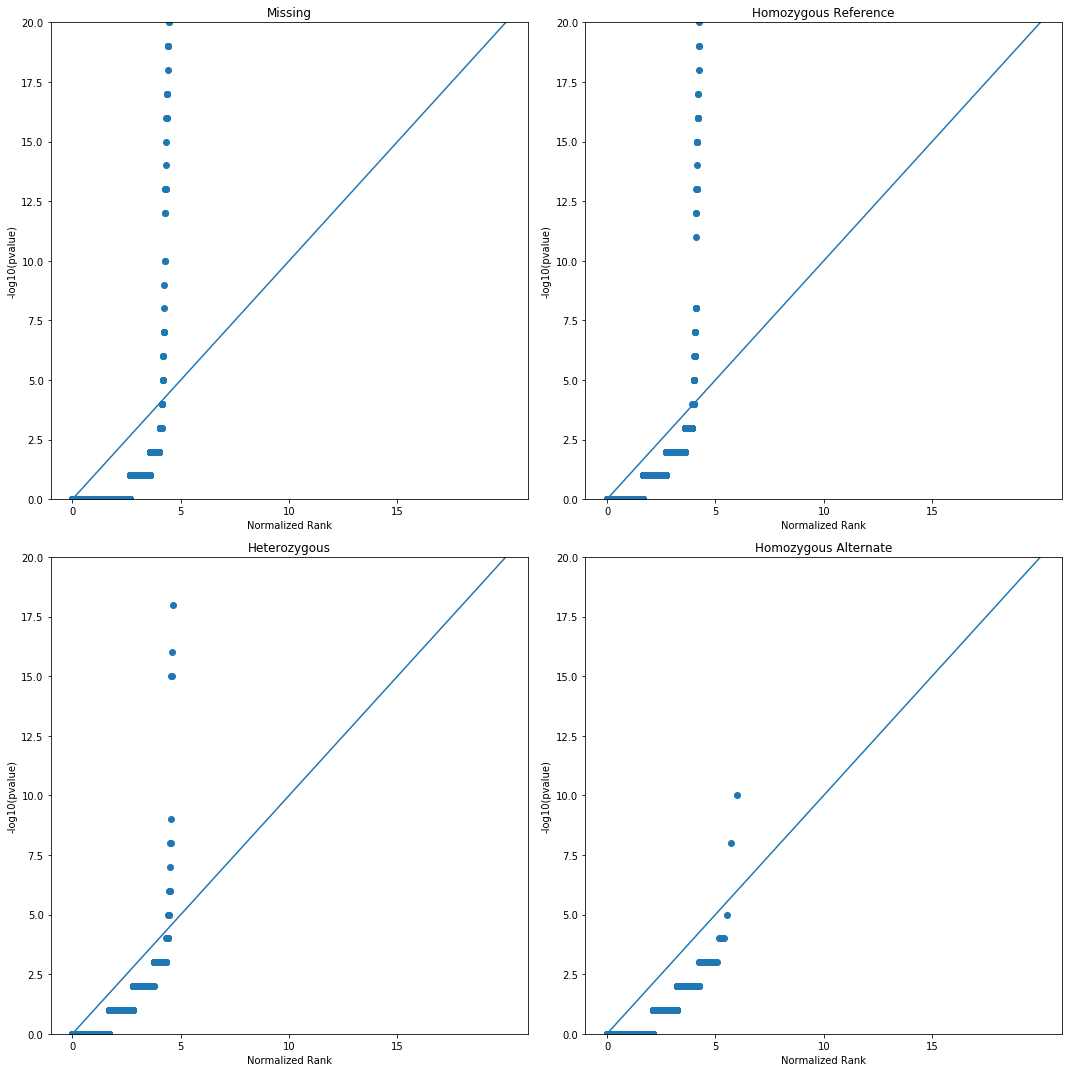

In [488]:
import scipy.stats as stats
import random

print(all_pvalues.shape)

indices = [random.randint(0, all_pvalues.shape[0]) for _ in range(1000000)]
print(len(indices))
plt.figure(figsize=(15, 15))

for i in range(4):
    plt.subplot(2, 2, i+1)

    s = np.sort(all_pvalues[indices, i])
    plt.scatter(-np.log10([1-(x/1000000) for x in range(1000000)]), s)
    #plt.xlim([0, 40])
    #plt.ylim([0, 40])

    plt.xlabel('Normalized Rank')
    plt.ylabel('-log10(pvalue)')
    plt.title(titles[i])
    plt.plot([0, 20], [0, 20])
    plt.xticks(range(0, 20, 5))
    plt.ylim([0, 20])
    
plt.tight_layout()
plt.show()

In [ ]:
titles = ['Missing', 'Homozygous Reference', 'Heterozygous', 'Homozygous Alternate']
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.xticks(offsets[:-1], chroms)
    plt.xlabel('Chromosome')
    plt.ylabel('-log10(pvalue)')
    plt.title(titles[i])
    plt.axhline(bonferonni_cutoff, color='black', linestyle='--')

plt.tight_layout()
plt.show()

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

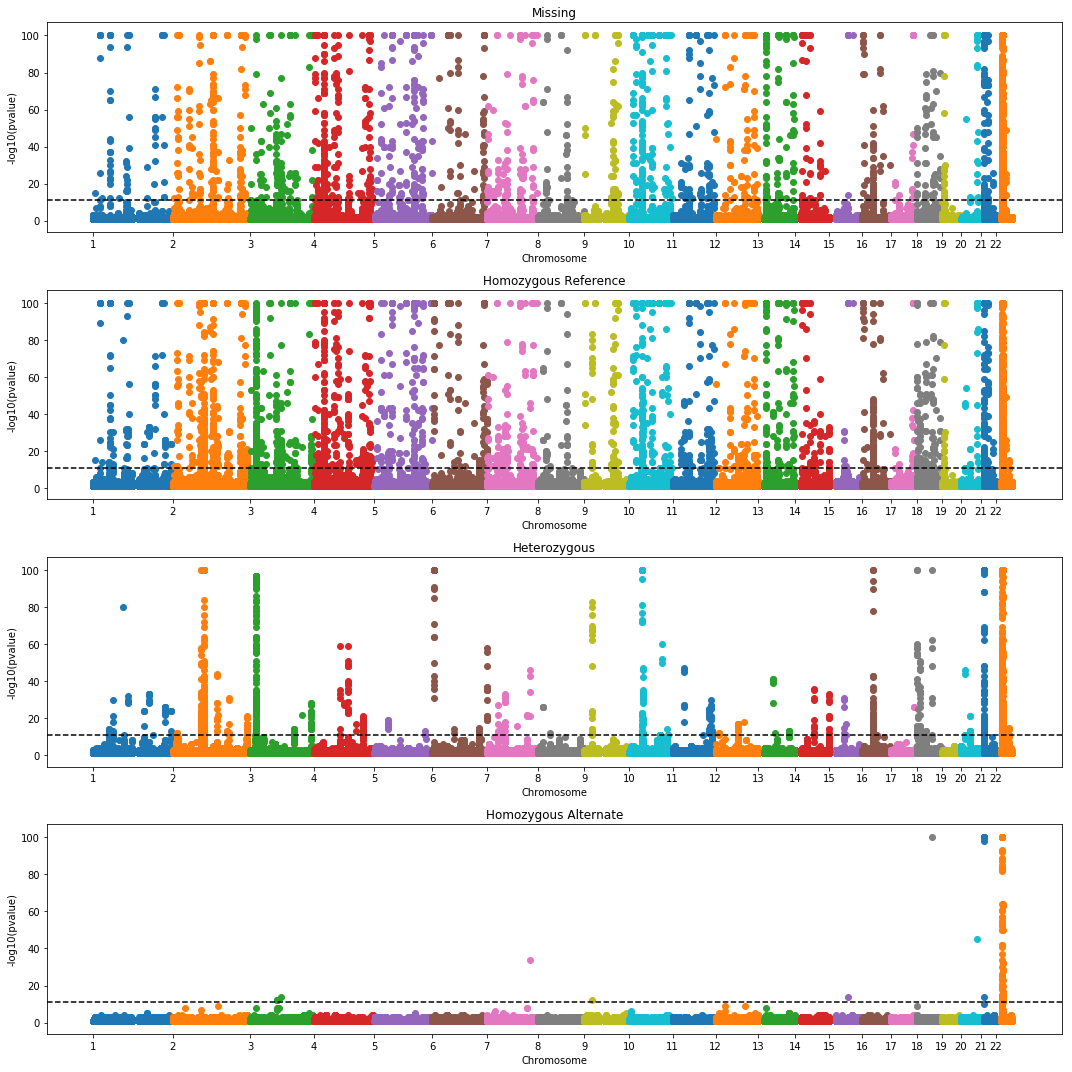

In [291]:
plt.figure(figsize=(15, 15))
offsets = [0]
sig_positions_ssc = []
for chrom in chroms:
    print(chrom, end=' ')
    
    # pull snp positions
    pos_data = np.load('%s/chr.%s.gen.coordinates.npy' % (ssc_data_dir, chrom))
    snp_positions = pos_data[:, 1]
    is_snp = pos_data[:, 2].astype(bool)
    snp_positions = snp_positions[is_snp]
    
    # pull log pvalues
    log_pvalues = np.load('%s/chr.%s.logpvalues.npy' % (ssc_pvalue_dir, chrom))
    log_pvalues[log_pvalues>100] = 100
    
    for i in range(4):
        # nonzero indices
        indices = log_pvalues[:, i] != 0

        plt.subplot(4, 1, i+1)
        plt.scatter(snp_positions[indices]+offsets[-1], log_pvalues[indices, i])
        
    indices = np.any(log_pvalues > bonferonni_cutoff, axis=1)
    sig_positions_ssc.extend([(chrom, p) for p in snp_positions[indices]])
    
    offsets.append(offsets[-1]+chrom_lengths[chrom])

titles = ['Missing', 'Homozygous Reference', 'Heterozygous', 'Homozygous Alternate']
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.xticks(offsets[:-1], chroms)
    plt.xlabel('Chromosome')
    plt.ylabel('-log10(pvalue)')
    plt.title(titles[i])
    plt.axhline(bonferonni_cutoff, color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [292]:
print('iHART', len(sig_positions), 'SSC', len(sig_positions_ssc), 'Both', len(set(sig_positions) & set(sig_positions_ssc)))
      
      

iHART 4774 SSC 3693 Both 2376


In [307]:
print(len(sig_positions)+len(sig_positions_ssc))
print(len(sig_somewhere))

8467
8467


In [447]:
sig_somewhere = set(sig_positions) | set(sig_positions_ssc)
sig_somewhere = sorted(sig_somewhere)
pos_to_index = dict([(x, i) for i, x in enumerate(sig_somewhere)])

In [449]:
with open('sex_gwas_sig_ihart_ssc.txt', 'w+') as f:
    for c, p in sig_somewhere:
        f.write('%s\t%d\n' % (c, p))

In [316]:
ihart_sig = -np.ones((len(sig_somewhere), 4), dtype=int)
ssc_sig = -np.ones((len(sig_somewhere), 4), dtype=int)
for chrom in chroms:
    print(chrom, end=' ')
    
    #iHART
    # pull snp positions
    pos_data = np.load('%s/chr.%s.gen.coordinates.npy' % (data_dir, chrom))
    snp_positions = pos_data[:, 1]
    is_snp = pos_data[:, 2].astype(bool)
    snp_positions = snp_positions[is_snp]
    
    # pull log pvalues
    log_pvalues = np.load('%s/chr.%s.logpvalues.npy' % (pvalue_dir, chrom))
    #log_pvalues[log_pvalues>100] = 100
    
    for i, x in enumerate(snp_positions):
        if (chrom, x) in pos_to_index:
            ihart_sig[pos_to_index[(chrom, x)]] = log_pvalues[i, :]
            
    #SSC
    # pull snp positions
    pos_data = np.load('%s/chr.%s.gen.coordinates.npy' % (ssc_data_dir, chrom))
    snp_positions = pos_data[:, 1]
    is_snp = pos_data[:, 2].astype(bool)
    snp_positions = snp_positions[is_snp]
    
    # pull log pvalues
    log_pvalues = np.load('%s/chr.%s.logpvalues.npy' % (ssc_pvalue_dir, chrom))
    #log_pvalues[log_pvalues>100] = 100
    
    for i, x in enumerate(snp_positions):
        if (chrom, x) in pos_to_index:
            ssc_sig[pos_to_index[(chrom, x)]] = log_pvalues[i, :]
    
    


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

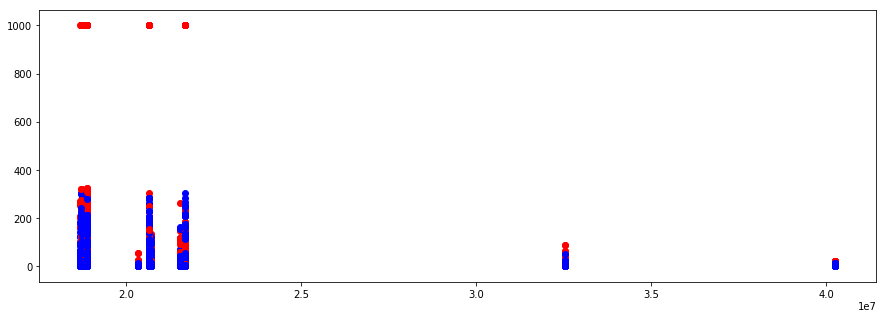

In [444]:
indices = [i for i, (c, p) in enumerate(sig_somewhere) if c=='22']
ps = [sig_somewhere[i][1] for i in indices]
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.scatter(ps, ihart_sig[indices, i], color='red')
    plt.scatter(ps, ssc_sig[indices, i], color='blue')

plt.show()

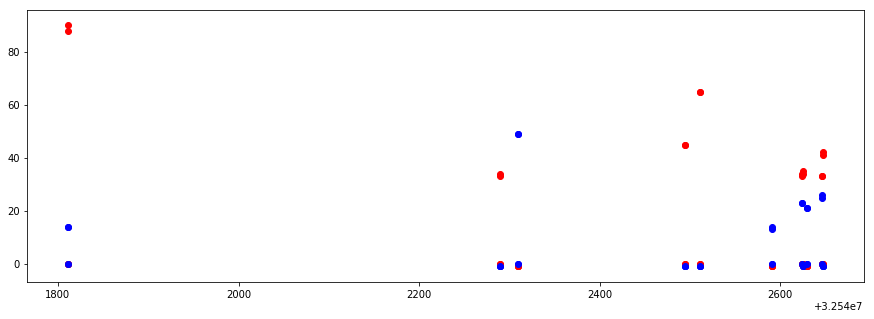

32541811 32542647 11


In [446]:
#min_p, max_p = 0, 2*pow(10, 7)
#min_p, max_p = 0, 1.87*pow(10, 7)
#min_p, max_p = 1.87*pow(10, 7), 1.8725*pow(10, 7)
#min_p, max_p = 1.88*pow(10, 7), 2*pow(10, 7)
min_p, max_p = 3*pow(10, 7), 3.5*pow(10, 7)

indices = [i for i, (c, p) in enumerate(sig_somewhere) if c=='22' and min_p <= p and p <= max_p]
ps = [sig_somewhere[i][1] for i in indices]
plt.figure(figsize=(15, 5))
for i in range(4):
    plt.scatter(ps, ihart_sig[indices, i], color='red')
    plt.scatter(ps, ssc_sig[indices, i], color='blue')

plt.show()

print(min(ps), max(ps), len(ps))

In [323]:
print(np.sum(np.any(ssc_sig==-1, axis=1)), np.sum(np.any(ihart_sig==-1, axis=1)))
print(np.sum(ssc_sig==-1)/4, np.sum(ihart_sig==-1)/4, np.sum((ihart_sig==-1) & (ssc_sig==-1))/4)
indices = np.where(np.all(ssc_sig>=0, axis=1) & np.all(ihart_sig>=0, axis=1))[0]
print(indices.shape)


1404 1089
1404.0 1089.0 0.0
(3598,)


In [368]:
print('Missing', np.sum(ihart_sig[:, 0]>bonferonni_cutoff), np.sum(ssc_sig[:, 0]>bonferonni_cutoff), 
      np.sum((ihart_sig[:, 0]>bonferonni_cutoff) & (ssc_sig[:, 0]>bonferonni_cutoff)))
print('Homref', np.sum(ihart_sig[:, 1]>bonferonni_cutoff), np.sum(ssc_sig[:, 1]>bonferonni_cutoff), 
      np.sum((ihart_sig[:, 1]>bonferonni_cutoff) & (ssc_sig[:, 1]>bonferonni_cutoff)))
print('Het', np.sum(ihart_sig[:, 2]>bonferonni_cutoff), np.sum(ssc_sig[:, 2]>bonferonni_cutoff), 
      np.sum((ihart_sig[:, 2]>bonferonni_cutoff) & (ssc_sig[:, 2]>bonferonni_cutoff)))
print('Homalt', np.sum(ihart_sig[:, 3]>bonferonni_cutoff), np.sum(ssc_sig[:, 3]>bonferonni_cutoff), 
      np.sum((ihart_sig[:, 3]>bonferonni_cutoff) & (ssc_sig[:, 3]>bonferonni_cutoff)))

print('Overall', np.sum(np.any(ihart_sig>bonferonni_cutoff, axis=1)), np.sum(np.any(ssc_sig>bonferonni_cutoff, axis=1)), np.sum(np.any(ihart_sig>bonferonni_cutoff, axis=1) & np.any(ssc_sig>bonferonni_cutoff, axis=1)))




Missing 2952 2337 1179
Homref 4565 3521 2229
Het 1944 1406 1226
Homalt 109 115 85
Overall 4774 3693 2376


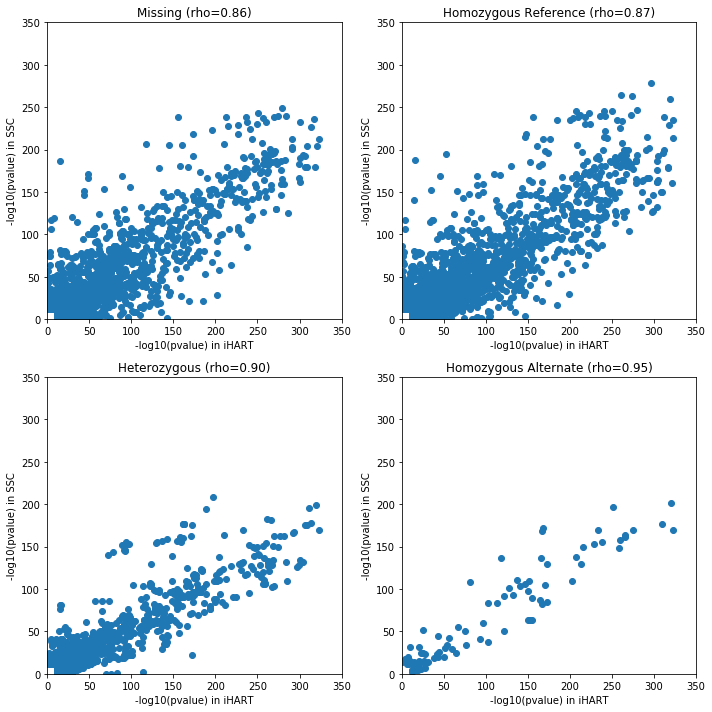

In [359]:
from scipy.stats.stats import pearsonr

plt.figure(figsize=(10, 10))

titles = ['Missing', 'Homozygous Reference', 'Heterozygous', 'Homozygous Alternate']
for j in range(4):
    plt.subplot(2, 2, j+1)
    corr_indices = [i for i in indices if ihart_sig[i, j]!=1000 and ssc_sig[i, j]!=1000 and \
                    (ihart_sig[i, j]>bonferonni_cutoff or ssc_sig[i, j]>bonferonni_cutoff)]
    plt.scatter(ihart_sig[corr_indices, j], ssc_sig[corr_indices, j])
    plt.xlim([0, 350])
    plt.ylim([0, 350])
    rho, pvalue = pearsonr(ihart_sig[corr_indices, j], ssc_sig[corr_indices, j])
    plt.title('%s (rho=%0.2f)' % (titles[j], rho))
    plt.xlabel('-log10(pvalue) in iHART')
    plt.ylabel('-log10(pvalue) in SSC')

plt.tight_layout()
plt.show()

In [358]:
for j in range(4):
    one_sig = [i for i in indices if ihart_sig[i, j]>bonferonni_cutoff or ssc_sig[i, j]>bonferonni_cutoff]
    two_sig = [i for i in indices if ihart_sig[i, j]>bonferonni_cutoff and ssc_sig[i, j]>bonferonni_cutoff]
    
    print(titles[j], len(two_sig)/len(one_sig))

Missing 0.6717948717948717
Homozygous Reference 0.6544333529066354
Heterozygous 0.6173212487411883
Homozygous Alternate 0.7142857142857143


# Now look at genotypes at these positions

In [492]:
# pull indices of moms, dads, daughters, and sons

def pull_family_indices(data_dir, ped_file):
    mom_indices, dad_indices = set(), set()
    daughter_indices, son_indices = set(), set()
    autism_indices, noautism_indices = set(), set()

    with open('%s/chr.%s.gen.samples.txt' % (data_dir, chrom), 'r') as f:
        sample_id_to_index = dict([(x.strip(), i) for i, x in enumerate(f)])

    with open(ped_file, 'r') as f:
        for line in f:
            pieces = line.strip().split('\t')
            if len(pieces) >= 5:
                if pieces[5] == '2':
                    if pieces[3] in sample_id_to_index:
                        mom_indices.add(sample_id_to_index[pieces[3]])
                    if pieces[2] in sample_id_to_index:
                        dad_indices.add(sample_id_to_index[pieces[2]])
                if pieces[1] in sample_id_to_index:
                    if pieces[4] == '2':
                        daughter_indices.add(sample_id_to_index[pieces[1]])
                    elif pieces[4] == '1':
                        son_indices.add(sample_id_to_index[pieces[1]])
                    if pieces[5] == '2':
                        autism_indices.add(sample_id_to_index[pieces[1]])
                    elif pieces[5] == '1':
                        noautism_indices.add(sample_id_to_index[pieces[1]])

    daughter_indices = daughter_indices - mom_indices
    son_indices = son_indices - dad_indices

    autism_indices = autism_indices & (daughter_indices | son_indices)
    noautism_indices = noautism_indices & (daughter_indices | son_indices)
    
    print('Moms', len(mom_indices), 'Dads', len(dad_indices))
    print('Daughters', len(daughter_indices), 'Sons', len(son_indices))
    print('Autism', len(autism_indices), 'No autism', len(noautism_indices))
    return mom_indices, dad_indices, daughter_indices, son_indices, autism_indices, noautism_indices

print('iHART')
ihart_mom_indices, ihart_dad_indices, ihart_daughter_indices, ihart_son_indices, ihart_autism_indices, ihart_noautism_indices = pull_family_indices(ihart_data_dir, ihart_ped_file)

print('\nSSC')
ssc_mom_indices, ssc_dad_indices, ssc_daughter_indices, ssc_son_indices, ssc_autism_indices, ssc_noautism_indices = pull_family_indices(ssc_data_dir, ssc_ped_file)



iHART
Moms 996 Dads 896
Daughters 777 Sons 1927
Autism 2179 No autism 525
SSC
Moms 518 Dads 518
Daughters 315 Sons 691
Autism 510 No autism 496


In [497]:
print('iHART', len(ihart_mom_indices)+len(ihart_dad_indices)+len(ihart_daughter_indices)+len(ihart_son_indices))
print('SSC', len(ssc_mom_indices)+len(ssc_dad_indices)+len(ssc_daughter_indices)+len(ssc_son_indices))

iHART 4596
SSC 2042


In [496]:
# now pull genotypes for sites of interest

def pull_genotypes(data_dir, pvalue_dir):
    positions_of_interest, gens_of_interest = [], []
    for chrom in chroms:
        print(chrom)

        # pull snp positions
        pos_data = np.load('%s/chr.%s.gen.coordinates.npy' % (data_dir, chrom))
        snp_positions = pos_data[:, 1]
        is_snp = pos_data[:, 2].astype(bool)

        # pull log pvalues
        log_pvalues = np.load('%s/chr.%s.logpvalues.npy' % (pvalue_dir, chrom))
        print(log_pvalues.shape)

        gen_files = sorted([f for f in listdir(data_dir) if ('chr.%s.' % chrom) in f and 'gen.npz' in f])
        offset_raw, offset_updated = 0, 0
        for gen_file in gen_files:
            print(gen_file)
            A = sparse.load_npz('%s/%s' % (data_dir, gen_file))
            m, n = A.shape
            local_snp_positions = snp_positions[offset_raw:(offset_raw+n)]

            # filter out snps
            A = A[:, is_snp[offset_raw:(offset_raw+n)]]
            local_snp_positions = local_snp_positions[is_snp[offset_raw:(offset_raw+n)]]
            offset_raw += n
            m, n = A.shape

            A[A<-1] = -1

            indices_of_interest = np.any(log_pvalues[offset_updated:(offset_updated+n)] > bonferonni_cutoff, axis=1)
            positions_of_interest.extend([(chrom, p) for p in local_snp_positions[indices_of_interest]])
            gens_of_interest.append(A[:, indices_of_interest].A)

            offset_updated += n

    gens_of_interest = np.hstack(gens_of_interest)
    m, n = gens_of_interest.shape
    print(len(positions_of_interest), m, n)
    return gens_of_interest, positions_of_interest

print('iHART')
ihart_gens_of_interest, ihart_positions_of_interest = pull_genotypes(ihart_data_dir, ihart_pvalue_dir)
print('\nSSC')
ssc_gens_of_interest, ssc_positions_of_interest = pull_genotypes(ssc_data_dir, ssc_pvalue_dir)

iHART
1
(5734832, 4)
chr.1.0.gen.npz
chr.1.1.gen.npz
chr.1.2.gen.npz
chr.1.3.gen.npz
2
(6130682, 4)
chr.2.0.gen.npz
chr.2.1.gen.npz
chr.2.2.gen.npz
chr.2.3.gen.npz
3
(5004468, 4)
chr.3.0.gen.npz
chr.3.1.gen.npz
chr.3.2.gen.npz
4
(5057877, 4)
chr.4.0.gen.npz
chr.4.1.gen.npz
chr.4.2.gen.npz
5
(4605420, 4)
chr.5.0.gen.npz
chr.5.1.gen.npz
chr.5.2.gen.npz
6
(4331684, 4)
chr.6.0.gen.npz
chr.6.1.gen.npz
chr.6.2.gen.npz
7
(4190321, 4)
chr.7.0.gen.npz
chr.7.1.gen.npz
chr.7.2.gen.npz
8
(3992696, 4)
chr.8.0.gen.npz
chr.8.1.gen.npz
chr.8.2.gen.npz
9
(3305436, 4)
chr.9.0.gen.npz
chr.9.1.gen.npz
chr.9.2.gen.npz
10
(3463889, 4)
chr.10.0.gen.npz
chr.10.1.gen.npz
chr.10.2.gen.npz
11
(3473317, 4)
chr.11.0.gen.npz
chr.11.1.gen.npz
12
(3317019, 4)
chr.12.0.gen.npz
chr.12.1.gen.npz
13
(2475224, 4)
chr.13.0.gen.npz
chr.13.1.gen.npz
14
(2344178, 4)
chr.14.0.gen.npz
chr.14.1.gen.npz
15
(2164322, 4)
chr.15.0.gen.npz
chr.15.1.gen.npz
16
(2420607, 4)
chr.16.0.gen.npz
chr.16.1.gen.npz
17
(2023375, 4)
chr.17.0.gen

In [499]:
np.save('../snps_of_interest/ihart_gens_of_interest', ihart_gens_of_interest)
with open('../snps_of_interest/ihart_positions_of_interest.txt', 'w+') as f:
    for chrom, pos in ihart_positions_of_interest:
        f.write('%s\t%d\n' % (chrom, pos))
        
np.save('../snps_of_interest/ssc_gens_of_interest', ssc_gens_of_interest)
with open('../snps_of_interest/ssc_positions_of_interest.txt', 'w+') as f:
    for chrom, pos in ssc_positions_of_interest:
        f.write('%s\t%d\n' % (chrom, pos))

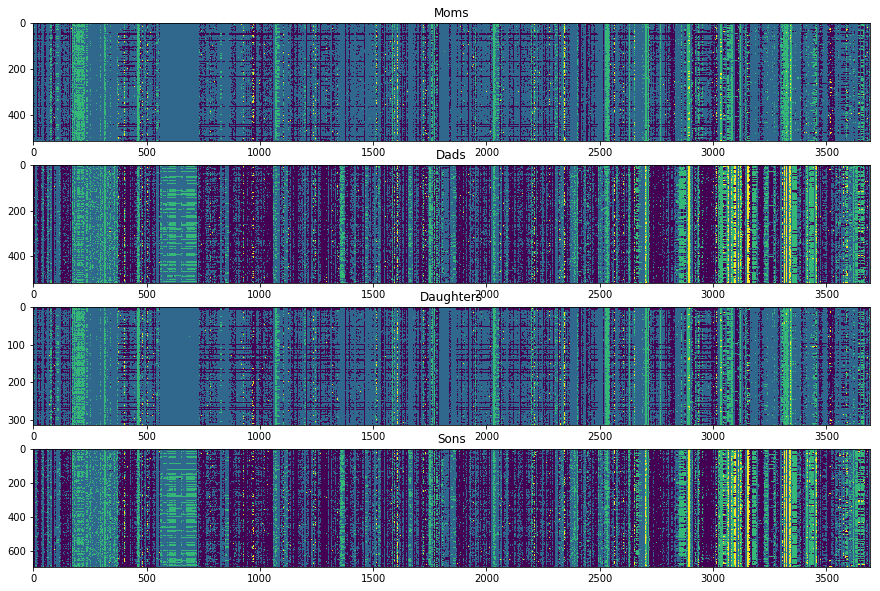

In [381]:
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.imshow(gens_of_interest[list(mom_indices), :], aspect='auto')
plt.title('Moms')

plt.subplot(4, 1, 2)
plt.imshow(gens_of_interest[list(dad_indices), :], aspect='auto')
plt.title('Dads')

plt.subplot(4, 1, 3)
plt.imshow(gens_of_interest[list(daughter_indices), :], aspect='auto')
plt.title('Daughters')

plt.subplot(4, 1, 4)
plt.imshow(gens_of_interest[list(son_indices), :], aspect='auto')
plt.title('Sons')

plt.show()

# Now run a GWAS for autism at these sites

In [382]:
def calc_pvalue(dc):        
    if np.all(dc>5):
        pvalue = chi2_contingency(dc, correction=True)[1]
        if pvalue == 0:
            logpvalue = 1000
        else:
            logpvalue = -np.log10(pvalue)
    elif (m==0 and d==0) or (m==num_moms and d==num_dads):
        logpvalue = 0
    else:
        pvalue = fisher_exact(dc)[1]
        if pvalue == 0:
            logpvalue = 1000
        else:
            logpvalue = -np.log10(pvalue)
    return logpvalue

In [383]:
autism_pvalues = np.zeros((n,), dtype=int)
for i in range(n):
    dc = np.asarray([[2*np.sum(gens_of_interest[list(autism_indices), i]==0) + np.sum(gens_of_interest[list(autism_indices), i]==1),
                     2*np.sum(gens_of_interest[list(autism_indices), i]==2) + np.sum(gens_of_interest[list(autism_indices), i]==1)],
                    [2*np.sum(gens_of_interest[list(noautism_indices), i]==0) + np.sum(gens_of_interest[list(noautism_indices), i]==1),
                     2*np.sum(gens_of_interest[list(noautism_indices), i]==2) + np.sum(gens_of_interest[list(noautism_indices), i]==1)]])
    #print(dc)
    autism_pvalues[i] = calc_pvalue(dc)
    
    
    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 

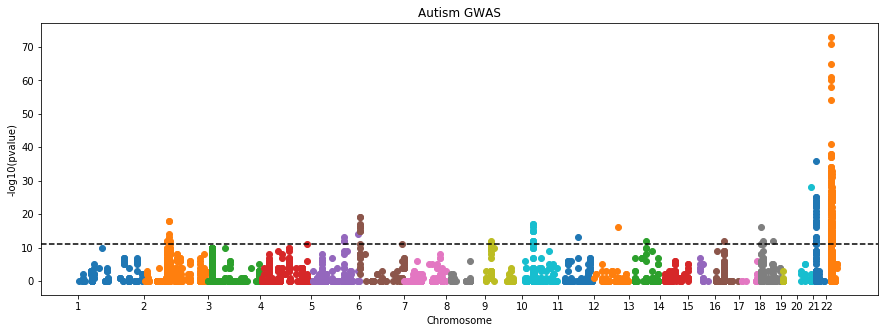

In [384]:
plt.figure(figsize=(15, 5))
offsets = [0]
for chrom in chroms:
    print(chrom, end=' ')
    
    # pull snp positions
    indices = [i for i, (c, pos) in enumerate(positions_of_interest) if c==chrom]
    pos_data = [positions_of_interest[i][1] for i in indices]
    
    # pull log pvalues
    log_pvalues = [autism_pvalues[i] for i in indices]
    plt.scatter([p+offsets[-1] for p in pos_data], log_pvalues)
    offsets.append(offsets[-1]+chrom_lengths[chrom])

plt.xticks(offsets[:-1], chroms)
plt.xlabel('Chromosome')
plt.ylabel('-log10(pvalue)')
plt.title('Autism GWAS')
plt.axhline(bonferonni_cutoff, color='black', linestyle='--')
plt.show()

261


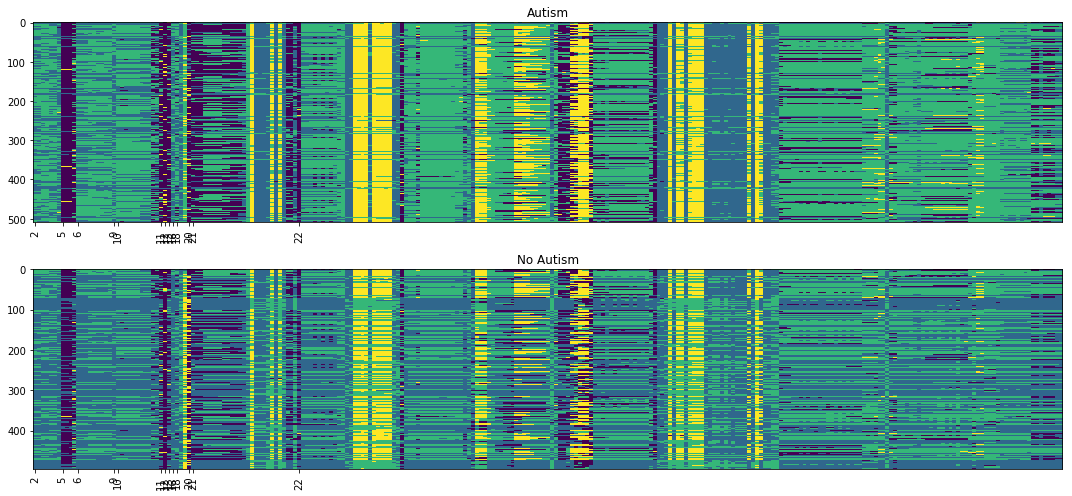

In [399]:
autism_gens_of_interest = gens_of_interest[:, autism_pvalues>bonferonni_cutoff]

tick_labels = []
ticks = []
for chrom in chroms:
    for i, (c, pos) in enumerate([positions_of_interest[j] for j in np.where(autism_pvalues>bonferonni_cutoff)[0]]):
        if (len(tick_labels) == 0 or tick_labels[-1] != chrom) and c == chrom:
            tick_labels.append(chrom)
            ticks.append(i) 
            
plt.figure(figsize=(15, 7))

plt.subplot(2, 1, 1)
plt.imshow(autism_gens_of_interest[list(autism_indices)], aspect='auto')
plt.title('Autism')
plt.xticks(ticks, tick_labels, rotation=90)


plt.subplot(2, 1, 2)
plt.imshow(autism_gens_of_interest[list(noautism_indices)], aspect='auto')
plt.title('No Autism')
plt.xticks(ticks, tick_labels, rotation=90)


print(np.sum(autism_pvalues>bonferonni_cutoff))
plt.tight_layout()
plt.show()

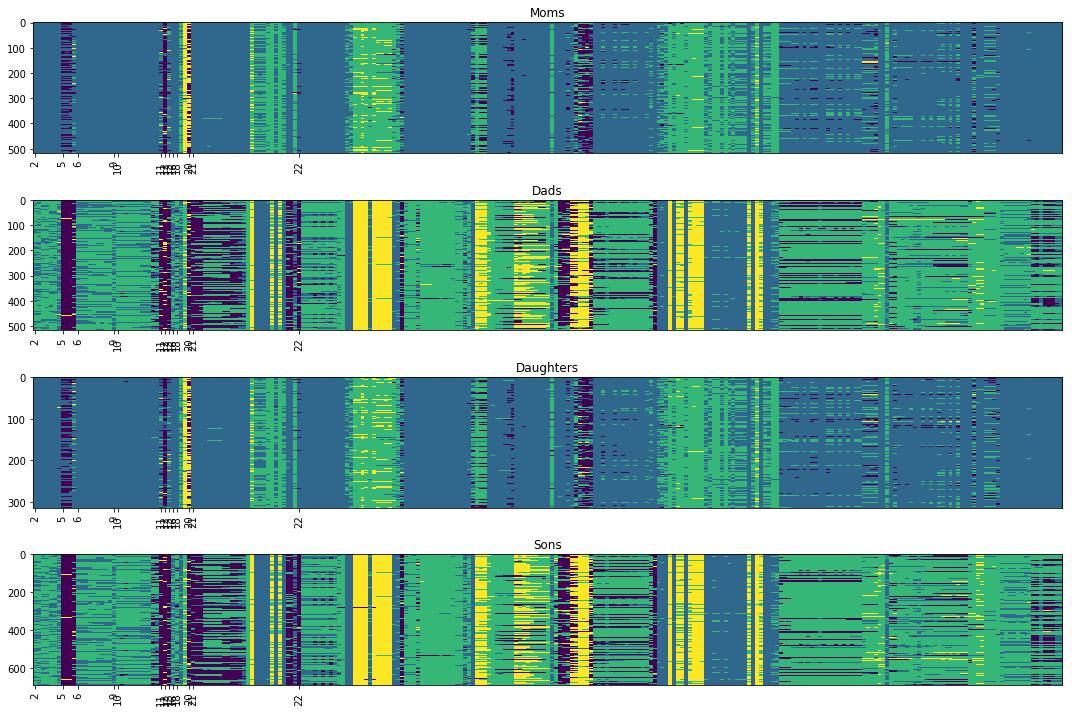

In [400]:
autism_gens_of_interest = gens_of_interest[:, autism_pvalues>bonferonni_cutoff]

plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.imshow(autism_gens_of_interest[list(mom_indices)], aspect='auto')
plt.title('Moms')
plt.xticks(ticks, tick_labels, rotation=90)

plt.subplot(4, 1, 2)
plt.imshow(autism_gens_of_interest[list(dad_indices)], aspect='auto')
plt.title('Dads')
plt.xticks(ticks, tick_labels, rotation=90)

plt.subplot(4, 1, 3)
plt.imshow(autism_gens_of_interest[list(daughter_indices)], aspect='auto')
plt.title('Daughters')
plt.xticks(ticks, tick_labels, rotation=90)

plt.subplot(4, 1, 4)
plt.imshow(autism_gens_of_interest[list(son_indices)], aspect='auto')
plt.title('Sons')
plt.xticks(ticks, tick_labels, rotation=90)

plt.tight_layout()
plt.show()

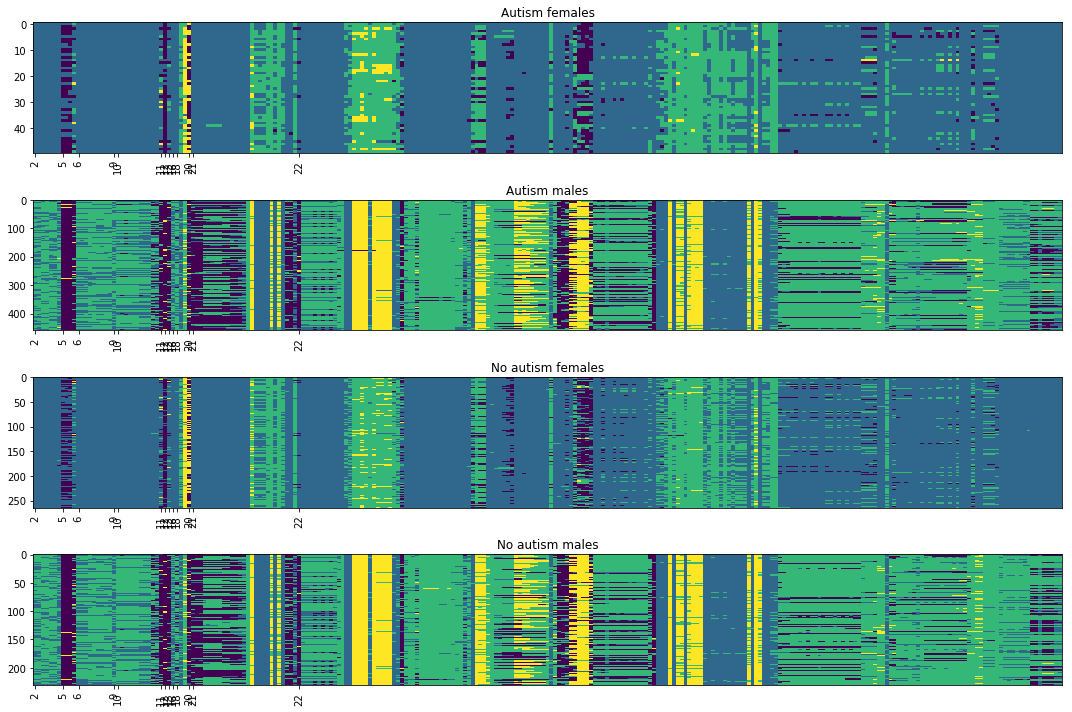

In [401]:
plt.figure(figsize=(15, 10))  

plt.subplot(4, 1, 1)
plt.imshow(autism_gens_of_interest[list(daughter_indices & autism_indices)], aspect='auto')
plt.title('Autism females')
plt.xticks(ticks, tick_labels, rotation=90)

plt.subplot(4, 1, 2)
plt.imshow(autism_gens_of_interest[list(son_indices & autism_indices)], aspect='auto')
plt.title('Autism males')
plt.xticks(ticks, tick_labels, rotation=90)

plt.subplot(4, 1, 3)
plt.imshow(autism_gens_of_interest[list(daughter_indices & noautism_indices)], aspect='auto')
plt.title('No autism females')
plt.xticks(ticks, tick_labels, rotation=90)

plt.subplot(4, 1, 4)
plt.imshow(autism_gens_of_interest[list(son_indices & noautism_indices)], aspect='auto')
plt.title('No autism males')
plt.xticks(ticks, tick_labels, rotation=90)

plt.tight_layout()
plt.show()